In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa as tsm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from statsmodels.formula.api import ols
from scipy import stats
from astsadata import *
import matplotlib.pyplot as plt


In [71]:
df=pd.read_csv("C:/Users/crive/OneDrive/Documents/SEMESTRE7/analiticaComp/Proyecto 2/NFLXR.csv")
#del df["Fecha"]
print(df)
df_train= df[0:900]
print(df_train)
df_try=df[900:]
print(df_try)

      Fecha    NFLX
0         1  127.49
1         2  129.41
2         3  131.81
3         4  131.07
4         5  130.95
...     ...     ...
1002   1003  513.97
1003   1004  519.12
1004   1005  530.87
1005   1006  524.59
1006   1007  540.73

[1007 rows x 2 columns]
     Fecha    NFLX
0        1  127.49
1        2  129.41
2        3  131.81
3        4  131.07
4        5  130.95
..     ...     ...
895    896  480.45
896    897  495.65
897    898  488.51
898    899  484.48
899    900  485.80

[900 rows x 2 columns]
      Fecha    NFLX
900     901  488.88
901     902  498.62
902     903  509.64
903     904  502.11
904     905  509.08
...     ...     ...
1002   1003  513.97
1003   1004  519.12
1004   1005  530.87
1005   1006  524.59
1006   1007  540.73

[107 rows x 2 columns]


In [72]:
def acf1(x, nlags=None, acf_type="correlation", pacf=False, ax=None, **kwargs):
    lags = np.arange(1, nlags + 1)

    if pacf:
        if acf_type == "correlation":
            values = sm.tsa.pacf(x, nlags=nlags)[1:]
            ylabel = "PACF"
    else:
        if acf_type == "correlation":
            values = sm.tsa.acf(x, nlags=nlags, fft=False)[1:]
            ylabel = "ACF"
        elif acf_type == "covariance":
            values = sm.tsa.acovf(x, nlag=nlags)[1:]
            ylabel = "ACoV"

    if ax is None:
        ax = plt.gca()
 
    ax.bar(lags, values, **kwargs)
    ax.axhline(0, color="black", linewidth=1)
    if acf_type == "correlation":
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color="red", linestyle="--", linewidth=1)
        ax.axhline(-conf_level, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    return ax


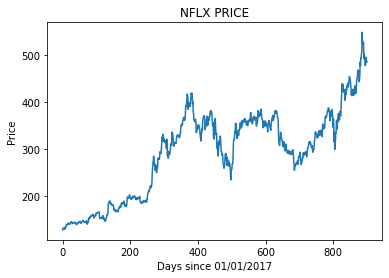

In [73]:
    df_train["NFLX"].plot(ylabel="Price",xlabel="Days since 01/01/2017", title="NFLX PRICE", legend=False)
    plt.show()
    

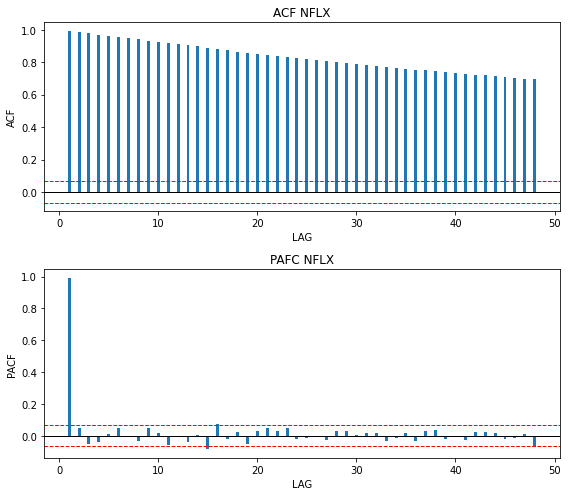

In [74]:
fig, axes = plt.subplots(nrows=2, figsize=(8, 7))

acf1(df_train["NFLX"], nlags=48, ax=axes[0], width=.3)
axes[0].set_title("ACF NFLX")

#acf1(EQ5.diff().dropna(), nlags=48, ax=axes[1], width=.3)
#axes[1].set_title("first difference")

acf1(df_train["NFLX"],pacf = True, nlags=48,ax=axes[1], width=.3)
axes[1].set_title("PAFC NFLX")
fig.tight_layout()
plt.show()
    

C:\Users\crive\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\crive\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\crive\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\crive\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is ava

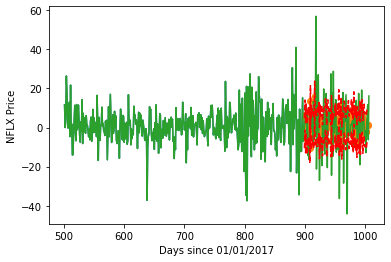

In [75]:
regr = sm.tsa.AutoReg(df_train["NFLX"].diff().dropna(), lags=106).fit()
fore = regr.get_prediction(start=len(df_train["NFLX"].diff().dropna()), end=len(df_train["NFLX"].diff().dropna()) + 106)

df_train["NFLX"].diff().dropna()[500:].plot(xlabel="Days since 01/01/2017", ylabel="NFLX Price", legend=False)
fore.predicted_mean.plot(marker="o")
df["NFLX"].diff().dropna()[500:].plot()
plt.plot(fore.predicted_mean + fore.se_mean, color="red", linestyle="--")
plt.plot(fore.predicted_mean - fore.se_mean, color="red", linestyle="--")
plt.show()

C:\Users\crive\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


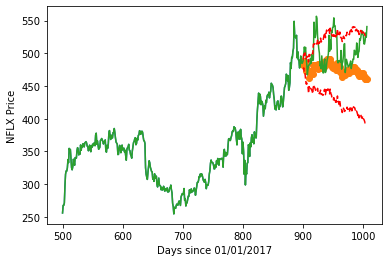

In [124]:
regr = sm.tsa.AutoReg(df_train["NFLX"], lags=106).fit()
fore = regr.get_prediction(start=len(df_train["NFLX"]), end=len(df_train["NFLX"]) + 106)

df_train["NFLX"][500:].plot(xlabel="Days since 01/01/2017", ylabel="NFLX Price", legend=False)
fore.predicted_mean.plot(marker="o")
df["NFLX"][500:].plot()
plt.plot(fore.predicted_mean + fore.se_mean, color="red", linestyle="--")
plt.plot(fore.predicted_mean - fore.se_mean, color="red", linestyle="--")
plt.show()

C:\Users\crive\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


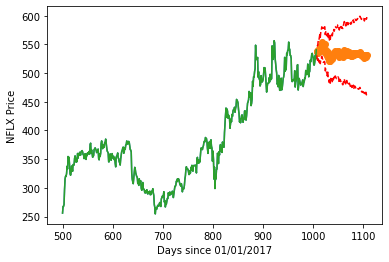

In [119]:
regr = sm.tsa.AutoReg(df["NFLX"], lags=100).fit()
fore = regr.get_prediction(start=len(df["NFLX"]), end=len(df["NFLX"]) + 100)

df["NFLX"][500:].plot(xlabel="Days since 01/01/2017", ylabel="NFLX Price", legend=False)
fore.predicted_mean.plot(marker="o")
df["NFLX"][500:].plot()
plt.plot(fore.predicted_mean + fore.se_mean, color="red", linestyle="--")
plt.plot(fore.predicted_mean - fore.se_mean, color="red", linestyle="--")
plt.show()

In [115]:
rec_ar = sm.tsa.arima.ARIMA(df_train["NFLX"], order=(0, 1, 3), enforce_stationarity=False, enforce_invertibility=False).fit()#method="yule_walker")
print(rec_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                   NFLX   No. Observations:                  900
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -3118.391
Date:                Thu, 08 Dec 2022   AIC                           6244.782
Time:                        19:03:29   BIC                           6263.969
Sample:                             0   HQIC                          6252.114
                                - 900                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0889      0.025     -3.555      0.000      -0.138      -0.040
ma.L2          0.0997      0.025      3.946      0.000       0.050       0.149
ma.L3          0.0449      0.026      1.735      0.0

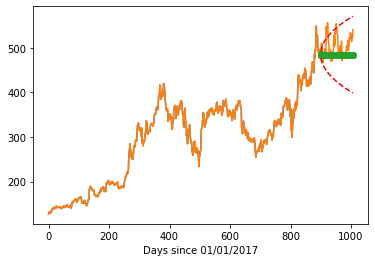

In [114]:
rec_pr = rec_ar.get_prediction(start=len(df_train["NFLX"]), end=len(df_train["NFLX"]) + 106)
U = rec_pr.predicted_mean + rec_pr.se_mean
L = rec_pr.predicted_mean - rec_pr.se_mean

df_train["NFLX"].plot(xlabel="Days since 01/01/2017", legend=False)
df["NFLX"].plot()
rec_pr.predicted_mean.plot(marker="o")
plt.plot(U, color="red", linestyle="--")
plt.plot(L, color="red", linestyle="--")
plt.show()